In [1]:
import duckdb
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import FAFSA.preprocessing as c0
import FAFSA.model_input as c1
from FAFSA.sample_for_train import *

In [3]:
path = '/mnt/s/FAFSA/fafsa'

In [4]:
con = c0.connect_db(path)

Version 0.6.1 detected.
Connecting to database...
Connection established! Execution time: 31.283219814300537 seconds


In [5]:
con.execute("""SELECT table_name
FROM INFORMATION_SCHEMA.TABLES
WHERE table_type = 'BASE TABLE'""").df()

,table_name
0,fafsa_final
1,fafsa_proteins
2,fafsa_protein_pairs
3,fafsa_ogt_taxa_pairs
4,fafsa_taxa
5,fafsa_taxa_pairs
6,protein_pairs
7,taxa_pairs
8,proteins
9,taxa


In [11]:
ncbi = con.execute("""SELECT ncbi_taxid FROM fafsa_taxa """).df()
ncbi.shape

(2533, 1)

In [12]:
ncbi.to_csv('/mnt/c/Users/Ryan/Desktop/230418_fafsa_taxa_NCBI.csv')

In [13]:
c0.build_fafsa(con)

Constructing fafsa_taxa_pairs...
Finished constructing fafsa_taxa_pairs. Execution time: 0.13713788986206055 seconds
Constructing fafsa_taxa...
Finished constructing fafsa_taxa. Execution time: 0.18755435943603516 seconds
Filtering on ogt and 16S sequence parameters...
Finished filtering. Execution time: 0.019744157791137695 seconds
Constructing fafsa_protein_pairs...
Finished constructing fafsa_protein_pairs. Execution time: 35.71446967124939 seconds
Constructing fafsa_proteins...
Finished constructing fafsa_proteins. Execution time: 411.6328020095825 seconds
Constructing final dataset...
Finishing up...
Finished. Total execution time: 2682.9232165813446 seconds


In [15]:
con = c0.connect_db(path)

Version 0.6.1 detected.
Connecting to database...
Connection established! Execution time: 30.19345498085022 seconds


In [16]:
con.execute("""SELECT table_name
FROM INFORMATION_SCHEMA.TABLES
WHERE table_type = 'BASE TABLE'""").df()

,table_name
0,fafsa_final
1,fafsa_proteins
2,fafsa_protein_pairs
3,fafsa_ogt_taxa_pairs
4,fafsa_taxa
5,fafsa_taxa_pairs
6,protein_pairs
7,taxa_pairs
8,proteins
9,taxa


In [64]:
df = con.execute("""SELECT * FROM fafsa_final USING SAMPLE 100""").df()

In [20]:
df.columns

Index(['thermo_protein_index', 'meso_protein_index',
       'local_gap_compressed_percent_id', 'scaled_local_query_percent_id',
       'scaled_local_symmetric_percent_id', 'local_E_value',
       'query_align_start', 'query_align_end', 'subject_align_end',
       'subject_align_start', 'query_align_len', 'query_align_cov',
       'subject_align_len', 'subject_align_cov', 'bit_score', 'thermo_index',
       'meso_index', 'prot_pair_index', 'meso_protein_int_index',
       'thermo_protein_int_index', 'taxa_pair_index',
       'local_gap_compressed_percent_id_16s',
       'scaled_local_query_percent_id_16s',
       'scaled_local_symmetric_percent_id_16s', 'query_align_cov_16s',
       'subject_align_cov_16s', 'bit_score_16s', 'm_ogt', 't_ogt',
       'ogt_difference', 'm_protein_seq', 't_protein_seq', 'm_protein_desc',
       't_protein_desc', 'm_protein_len', 't_protein_len'],
      dtype='object')

In [65]:
_, idx = c2.fafsa_sample(df = df, size = 100, stat_samp = 'frankwolfe', tol = 1e-04)

In [66]:
len(np.unique(idx))

16

In [61]:
df_samp = df.iloc[idx]
df_samp.head()

,thermo_protein_index,meso_protein_index,local_gap_compressed_percent_id,scaled_local_query_percent_id,scaled_local_symmetric_percent_id,local_E_value,query_align_start,query_align_end,subject_align_end,subject_align_start,...,bit_score_16s,m_ogt,t_ogt,ogt_difference,m_protein_seq,t_protein_seq,m_protein_desc,t_protein_desc,m_protein_len,t_protein_len
6,14963.145,6978.5605,0.450980,0.348485,0.176245,2.810000e-04,5,53,116,49,...,1163.0,28.0,52.5,24.5,MSDSGVPGSGLAKGLAVTLKTMTRRSTTQQYPDVAPELPPRSRGVI...,MGVTVTERCQGCGACLLTCPEHALRPRGPALLVRADLCTGCLECVE...,NADH-quinone oxidoreductase subunit I,4Fe-4S binding protein,195,66
821,14963.2627,6855.1263,0.431095,0.322751,0.352092,5.870000e-39,1,348,305,1,...,1033.0,28.0,52.5,24.5,MARDYYEVLGVSRSASQDEIQQAYRKLARRHHPDVNKDPGAEERFK...,MARDYYAILGVRRDASPDEIKKAYRRLARELHPDVNPDPETQERFK...,J domain-containing protein,molecular chaperone DnaJ,315,378
999,7134.429,516.210,0.533333,0.250000,0.112281,1.520000e+00,25,58,100,72,...,977.0,28.0,52.5,24.5,MGAMAELSVLVVDDEELIRAGLHLLLDGAEGLHIAGEAADGHRAVE...,MRLTEFWERMDQHLGAGYARTWAREQVLADLGERTVLQALEAGWDT...,response regulator transcription factor,DUF3046 domain-containing protein,221,64
865,10686.9,3888.696,0.647059,0.656716,0.651852,5.130000e-21,1,67,68,1,...,1117.0,20.0,45.0,25.0,MTRTSEWTVTGMTCEHCVASVTEEVSEIPTVTDVSVTLDGGRVVVT...,MTRSTYTVTGMTCHHCVASVTEEISEISGVRQVDVDLASGLVTVTS...,heavy-metal-associated domain-containing protein,heavy-metal-associated domain-containing protein,68,67
821,14963.2627,6855.1263,0.431095,0.322751,0.352092,5.870000e-39,1,348,305,1,...,1033.0,28.0,52.5,24.5,MARDYYEVLGVSRSASQDEIQQAYRKLARRHHPDVNKDPGAEERFK...,MARDYYAILGVRRDASPDEIKKAYRRLARELHPDVNPDPETQERFK...,J domain-containing protein,molecular chaperone DnaJ,315,378


In [62]:
df_samp.shape

(100, 36)

<Axes: xlabel='local_gap_compressed_percent_id', ylabel='Count'>

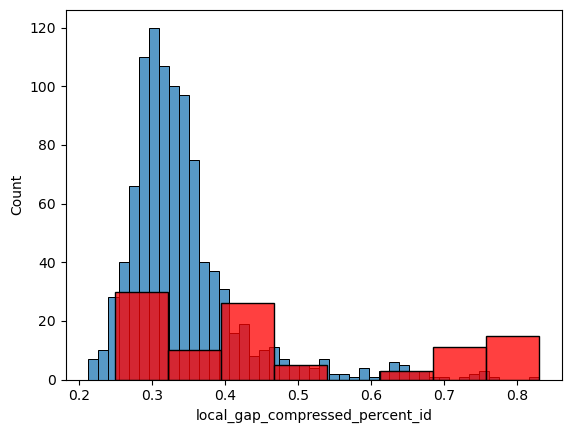

In [63]:
sns.histplot(df, x = 'local_gap_compressed_percent_id')
sns.histplot(df_samp, x = 'local_gap_compressed_percent_id', color = 'r')


In [99]:
big_samp = df.sample(0)
for i in range(10000):
    df = con.execute("""SELECT * FROM fafsa_final USING SAMPLE 100""").df()
    _, idx = c2.fafsa_sample(df = df, size = 20, stat_samp = 'frankwolfe', tol = 5e-06)
    df_samp = df.iloc[np.unique(idx)]
    big_samp = pd.concat([big_samp, df_samp], axis = 0)
    if (i+1) % 10 ==0:
        doubles = big_samp.shape[0] - len(np.unique(big_samp['prot_pair_index']))
        print(f'Round {i+1}: {big_samp.shape[0]} rows, {doubles} doubles')
        big_samp.to_csv('/mnt/g/My Drive/ValidProt Data/fw_data.csv')
        


Round 10: 109 rows, 0 doubles
Round 20: 216 rows, 0 doubles
Round 30: 310 rows, 0 doubles
Round 40: 414 rows, 0 doubles
Round 50: 519 rows, 0 doubles
Round 60: 619 rows, 0 doubles
Round 70: 730 rows, 0 doubles
Round 80: 832 rows, 0 doubles
Round 90: 935 rows, 0 doubles
Round 100: 1034 rows, 0 doubles
Round 110: 1136 rows, 0 doubles
Round 120: 1245 rows, 0 doubles
Round 130: 1347 rows, 0 doubles
Round 140: 1449 rows, 0 doubles
Round 150: 1553 rows, 0 doubles
Round 160: 1664 rows, 1 doubles
Round 170: 1767 rows, 1 doubles
Round 180: 1871 rows, 1 doubles
Round 190: 1977 rows, 1 doubles
Round 200: 2080 rows, 1 doubles
Round 210: 2180 rows, 1 doubles
Round 220: 2288 rows, 1 doubles
Round 230: 2385 rows, 1 doubles
Round 240: 2487 rows, 1 doubles
Round 250: 2592 rows, 1 doubles
Round 260: 2695 rows, 1 doubles
Round 270: 2795 rows, 1 doubles
Round 280: 2903 rows, 1 doubles
Round 290: 3005 rows, 1 doubles
Round 300: 3107 rows, 1 doubles
Round 310: 3205 rows, 1 doubles
Round 320: 3303 rows, 1 do

Round 2480: 25460 rows, 18 doubles
Round 2490: 25557 rows, 18 doubles
Round 2500: 25656 rows, 19 doubles
Round 2510: 25771 rows, 19 doubles
Round 2520: 25868 rows, 19 doubles
Round 2530: 25974 rows, 19 doubles
Round 2540: 26075 rows, 20 doubles
Round 2550: 26175 rows, 20 doubles
Round 2560: 26280 rows, 20 doubles
Round 2570: 26391 rows, 20 doubles
Round 2580: 26490 rows, 20 doubles
Round 2590: 26592 rows, 20 doubles
Round 2600: 26697 rows, 20 doubles
Round 2610: 26800 rows, 21 doubles
Round 2620: 26898 rows, 22 doubles
Round 2630: 27007 rows, 22 doubles
Round 2640: 27116 rows, 23 doubles
Round 2650: 27215 rows, 23 doubles
Round 2660: 27315 rows, 23 doubles
Round 2670: 27419 rows, 23 doubles
Round 2680: 27525 rows, 23 doubles
Round 2690: 27620 rows, 23 doubles
Round 2700: 27718 rows, 23 doubles
Round 2710: 27812 rows, 23 doubles
Round 2720: 27916 rows, 23 doubles
Round 2730: 28022 rows, 23 doubles
Round 2740: 28127 rows, 23 doubles
Round 2750: 28223 rows, 23 doubles
Round 2760: 28332 ro

Round 4830: 49608 rows, 96 doubles
Round 4840: 49713 rows, 96 doubles
Round 4850: 49817 rows, 98 doubles
Round 4860: 49915 rows, 98 doubles
Round 4870: 50015 rows, 99 doubles
Round 4880: 50112 rows, 100 doubles
Round 4890: 50219 rows, 100 doubles
Round 4900: 50318 rows, 100 doubles
Round 4910: 50422 rows, 100 doubles
Round 4920: 50522 rows, 100 doubles
Round 4930: 50620 rows, 100 doubles
Round 4940: 50724 rows, 100 doubles
Round 4950: 50823 rows, 100 doubles
Round 4960: 50923 rows, 100 doubles
Round 4970: 51026 rows, 101 doubles
Round 4980: 51123 rows, 101 doubles
Round 4990: 51228 rows, 102 doubles
Round 5000: 51337 rows, 102 doubles
Round 5010: 51441 rows, 103 doubles
Round 5020: 51544 rows, 106 doubles
Round 5030: 51643 rows, 106 doubles
Round 5040: 51751 rows, 106 doubles
Round 5050: 51860 rows, 107 doubles
Round 5060: 51970 rows, 108 doubles
Round 5070: 52073 rows, 109 doubles
Round 5080: 52169 rows, 109 doubles
Round 5090: 52269 rows, 109 doubles
Round 5100: 52378 rows, 110 doubl

Round 7110: 73088 rows, 215 doubles
Round 7120: 73192 rows, 215 doubles
Round 7130: 73298 rows, 215 doubles
Round 7140: 73399 rows, 215 doubles
Round 7150: 73502 rows, 217 doubles
Round 7160: 73607 rows, 218 doubles
Round 7170: 73705 rows, 218 doubles
Round 7180: 73809 rows, 218 doubles
Round 7190: 73917 rows, 218 doubles
Round 7200: 74014 rows, 218 doubles
Round 7210: 74111 rows, 218 doubles
Round 7220: 74216 rows, 221 doubles
Round 7230: 74318 rows, 221 doubles
Round 7240: 74418 rows, 223 doubles
Round 7250: 74523 rows, 224 doubles
Round 7260: 74629 rows, 225 doubles
Round 7270: 74732 rows, 228 doubles
Round 7280: 74838 rows, 229 doubles
Round 7290: 74940 rows, 229 doubles
Round 7300: 75046 rows, 229 doubles
Round 7310: 75161 rows, 230 doubles
Round 7320: 75269 rows, 231 doubles
Round 7330: 75373 rows, 231 doubles
Round 7340: 75469 rows, 232 doubles
Round 7350: 75576 rows, 233 doubles
Round 7360: 75681 rows, 233 doubles
Round 7370: 75777 rows, 233 doubles
Round 7380: 75875 rows, 234 

Round 9390: 96552 rows, 403 doubles
Round 9400: 96659 rows, 404 doubles
Round 9410: 96760 rows, 404 doubles
Round 9420: 96865 rows, 404 doubles
Round 9430: 96968 rows, 405 doubles
Round 9440: 97080 rows, 407 doubles
Round 9450: 97188 rows, 407 doubles
Round 9460: 97292 rows, 407 doubles
Round 9470: 97397 rows, 409 doubles
Round 9480: 97495 rows, 410 doubles
Round 9490: 97600 rows, 410 doubles
Round 9500: 97708 rows, 411 doubles
Round 9510: 97810 rows, 412 doubles
Round 9520: 97912 rows, 413 doubles
Round 9530: 98015 rows, 414 doubles
Round 9540: 98115 rows, 414 doubles
Round 9550: 98212 rows, 414 doubles
Round 9560: 98319 rows, 416 doubles
Round 9570: 98426 rows, 417 doubles
Round 9580: 98522 rows, 418 doubles
Round 9590: 98619 rows, 419 doubles
Round 9600: 98720 rows, 420 doubles
Round 9610: 98823 rows, 420 doubles
Round 9620: 98923 rows, 420 doubles
Round 9630: 99024 rows, 420 doubles
Round 9640: 99124 rows, 421 doubles
Round 9650: 99228 rows, 425 doubles
Round 9660: 99331 rows, 425 

In [97]:
big_samp.shape

(199, 36)

<Axes: xlabel='local_gap_compressed_percent_id', ylabel='Count'>

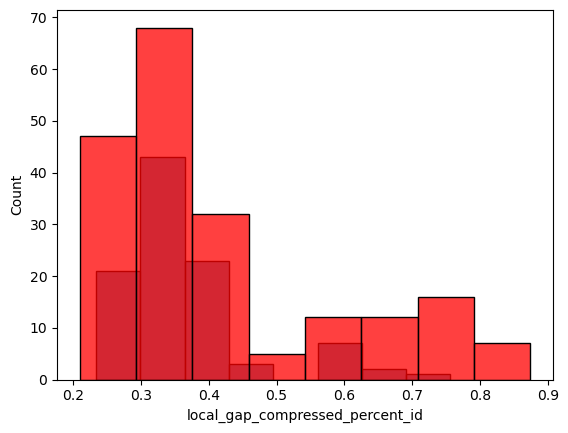

In [98]:
sns.histplot(df, x = 'local_gap_compressed_percent_id', bins = 8)
sns.histplot(big_samp, x = 'local_gap_compressed_percent_id', color = 'r', bins = 8)

In [94]:
test = pd.read_csv('/mnt/g/My Drive/ValidProt Data/fw_data.csv')

207